In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import datetime as dt
import re
import time
import dateutil
dataEC2Costs = '/home/joe/data/datadog/ec2-costs-before-RIs.csv'
dfEC2Costs = pd.read_csv(dataEC2Costs)

In [2]:
dfEC2Costs.head(5)

,EC2-Name,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,...,Week 17,Week 18,Week 19,Week 20,Week 21,Week 22,Week 23,Week 24,Week 25,Week 26
0,1,"$40,622.21","$36,888.26","$36,910.70","$37,140.28","$37,181.08","$37,034.22","$37,411.04","$37,714.68","$37,074.65",...,"$45,532.70","$46,785.87","$49,711.79","$50,500.74","$50,522.24","$49,326.39","$49,299.11","$62,570.05","$85,672.67","$73,250.49"
1,2,"$20,019.22","$20,594.31","$20,915.66","$23,208.02","$30,047.39","$30,795.16","$31,174.00","$32,520.12","$34,649.24",...,"$40,436.34","$40,641.72","$40,700.10","$40,710.81","$40,902.12","$41,283.48","$42,171.36","$42,687.96","$43,086.54","$43,960.75"
2,3,"$59,665.66","$61,938.54","$62,283.65","$63,667.58","$68,540.23","$71,801.41","$72,370.87","$73,683.88","$75,918.98",...,"$104,932.84","$102,258.36","$66,631.54","$42,481.09","$46,612.39","$43,857.73","$26,019.21","$20,914.81","$15,780.66","$10,701.87"
3,4,"$17,140.20","$17,708.04","$17,775.24","$17,860.08","$18,910.92","$19,773.60","$20,299.44","$20,919.78","$21,272.58",...,"$28,157.98","$27,631.98","$27,631.72","$28,772.13","$31,755.70","$32,106.50","$31,950.52","$32,824.60","$34,643.33","$30,894.52"
4,5,"$3,140.84","$4,455.79","$5,150.52","$6,172.86","$7,733.47","$10,970.52","$14,296.35","$17,659.14","$14,167.01",...,"$20,820.97","$19,923.63","$18,803.02","$28,986.57","$34,112.73","$26,520.98","$27,102.72","$29,119.87","$32,981.04","$39,579.43"


In [3]:
dfEC2Costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EC2-Name  29 non-null     int64 
 1   Week 1    27 non-null     object
 2   Week 2    27 non-null     object
 3   Week 3    27 non-null     object
 4   Week 4    27 non-null     object
 5   Week 5    27 non-null     object
 6   Week 6    27 non-null     object
 7   Week 7    27 non-null     object
 8   Week 8    28 non-null     object
 9   Week 9    28 non-null     object
 10  Week 10   28 non-null     object
 11  Week 11   28 non-null     object
 12  Week 12   28 non-null     object
 13  Week 13   28 non-null     object
 14  Week 14   28 non-null     object
 15  Week 15   28 non-null     object
 16  Week 16   28 non-null     object
 17  Week 17   28 non-null     object
 18  Week 18   29 non-null     object
 19  Week 19   29 non-null     object
 20  Week 20   29 non-null     object
 21  Week 21   29 non-n

In [4]:
dfEC2CostsT = dfEC2Costs.set_index('EC2-Name').transpose().fillna(0.0)
dfEC2CostsT = dfEC2CostsT.reset_index(0)
dfEC2CostsT = dfEC2CostsT.rename(columns={'index':'Weeks'})
dfEC2CostsT.head(5)

EC2-Name,Weeks,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Week 1,"$40,622.21","$20,019.22","$59,665.66","$17,140.20","$3,140.84","$8,232.70","$16,287.52",0,"$10,510.02",...,"$3,504.41","$3,214.85","$1,040.33","$1,847.49","$2,290.18","$1,521.63","$2,916.19","$1,916.04",$885.78,"$1,117.20"
1,Week 2,"$36,888.26","$20,594.31","$61,938.54","$17,708.04","$4,455.79","$10,119.57","$16,418.70",0,"$10,341.07",...,"$3,497.09","$3,214.85","$1,027.82","$1,614.48","$2,290.18","$1,523.63","$2,891.45","$1,916.04",$718.92,"$1,117.20"
2,Week 3,"$36,910.70","$20,915.66","$62,283.65","$17,775.24","$5,150.52","$10,690.47","$16,516.87",0,"$10,722.40",...,"$3,497.09","$3,214.85","$1,027.82","$1,614.48","$2,290.18","$1,521.37","$2,891.45","$1,916.04",$791.05,"$1,117.20"
3,Week 4,"$37,140.28","$23,208.02","$63,667.58","$17,860.08","$6,172.86","$10,691.10","$16,644.64",0,"$10,837.78",...,"$3,495.76","$3,212.19","$1,027.82","$1,657.97","$2,289.51","$1,682.16","$2,891.45","$2,570.77","$1,138.00","$1,117.07"
4,Week 5,"$37,181.08","$30,047.39","$68,540.23","$18,910.92","$7,733.47","$11,535.72","$16,655.72",0,"$10,785.72",...,"$3,497.09","$3,214.85","$1,307.12","$1,706.05","$2,392.38","$1,721.66","$2,891.45","$2,775.86","$1,782.15","$1,117.20"


In [5]:
dfEC2CostsT.tail()

EC2-Name,Weeks,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
21,Week 22,"$49,326.39","$41,283.48","$43,857.73","$32,106.50","$26,520.98","$20,613.60","$10,890.39","$18,333.30","$20,100.29",...,"$3,381.43","$3,381.43","$2,787.15","$2,321.59","$2,513.62","$2,270.83","$3,095.74","$2,775.86","$1,347.87","$1,318.83"
22,Week 23,"$49,299.11","$42,171.36","$26,019.21","$31,950.52","$27,102.72","$20,866.44","$10,944.99","$18,886.68","$20,532.05",...,"$3,472.20","$3,442.94","$2,797.79","$2,405.07","$2,514.28","$2,291.84","$2,703.46","$2,775.86",$980.13,"$1,318.56"
23,Week 24,"$62,570.05","$42,687.96","$20,914.81","$32,824.60","$29,119.87","$21,101.85","$11,608.38","$18,614.13","$20,583.64",...,"$3,440.95","$3,438.29","$2,793.00","$2,432.98","$2,513.62","$2,248.68","$2,703.46","$2,775.86",$754.71,"$1,318.30"
24,Week 25,"$85,672.67","$43,086.54","$15,780.66","$34,643.33","$32,981.04","$21,160.02","$12,455.52","$18,673.47","$21,215.71",...,"$3,438.29","$3,438.29","$2,792.73","$2,554.90","$2,851.07","$2,282.36","$2,703.46","$2,775.86",$870.38,"$1,317.50"
25,Week 26,"$73,250.49","$43,960.75","$10,701.87","$30,894.52","$39,579.43","$21,167.60","$12,453.85","$19,080.40","$20,543.00",...,"$3,438.29","$3,438.29","$2,793.21","$2,742.95","$2,576.34","$2,266.54","$2,659.18","$2,775.86","$1,111.47","$1,318.33"


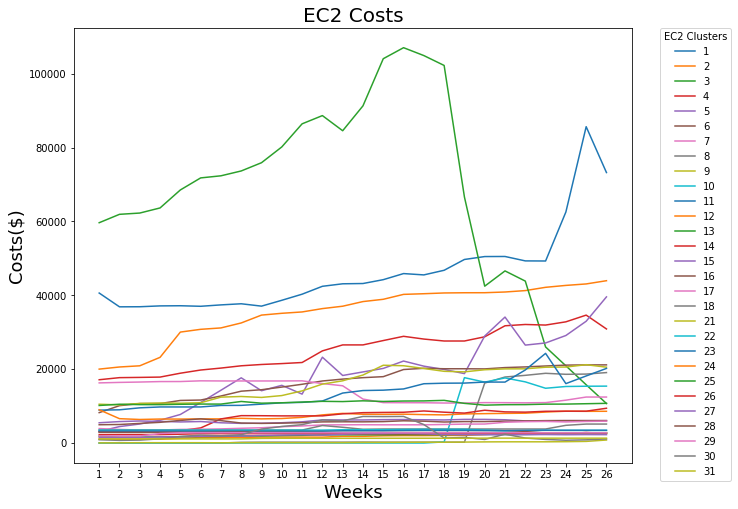

In [6]:
df = dfEC2CostsT
fig = plt.figure(figsize=(10,8))
ax=plt.gca()
ax.set_title("EC2 Costs", fontsize=20)
ax.set_ylabel("Costs($)", color='black', fontsize=18)
ax.set_xlabel("Weeks", color='black', fontsize=18)

regex = re.compile(r'Week\s+', flags=re.IGNORECASE)
df['Weeks'] = df['Weeks'].str.replace(regex,'')

cols = df.columns.values.tolist()
cols.pop(0)

colsList = []
colsLabels = []
for col in cols:
    df[col]= df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)
    plt.plot(df['Weeks'],df[col])
    colsList.append(df[col])
    colsLabels.append(col)

plt.legend(cols,title="EC2 Clusters",bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0)
plt.show()

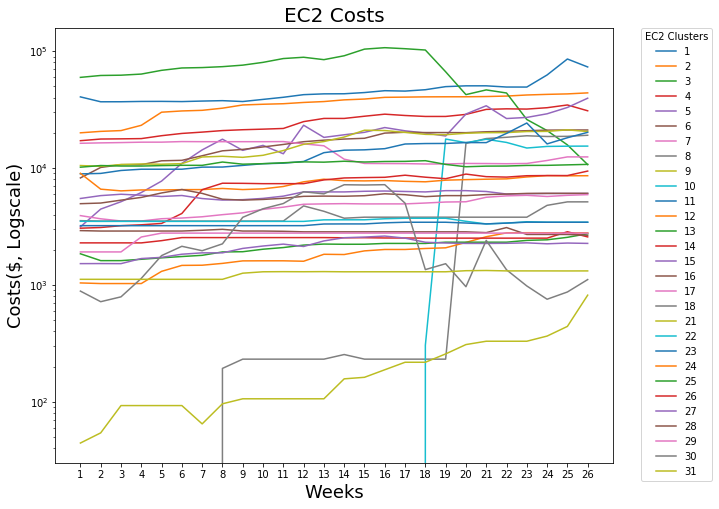

In [7]:
figLog = plt.figure(figsize=(10,8))
ax=plt.gca()
ax.set_title("EC2 Costs", fontsize=20)
ax.set_ylabel("Costs($, Logscale)", color='black', fontsize=18)
ax.set_xlabel("Weeks", color='black', fontsize=18)
ax.set_yscale('log')

for col in cols:
    plt.plot(df['Weeks'],df[col])

plt.legend(cols,title="EC2 Clusters",bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0)
plt.show()

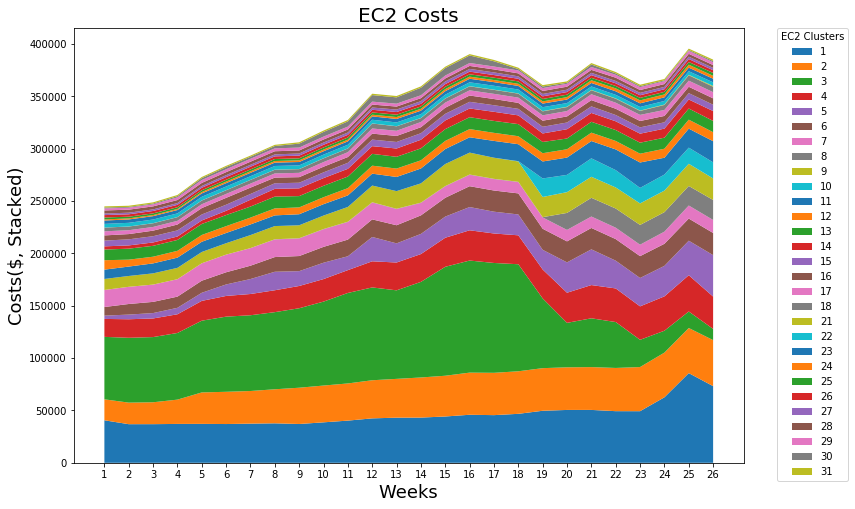

In [8]:
figArea = plt.figure(figsize=(12,8))
plt.title('EC2 Instances')
ax=plt.gca()
ax.set_title("EC2 Costs", fontsize=20)
ax.set_ylabel("Costs($, Stacked)", color='black', fontsize=18)
ax.set_xlabel("Weeks", color='black', fontsize=18)
#plt.legend(cols,title="EC2-Name",bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0)

plt.stackplot(df['Weeks'],colsList,labels=colsLabels)
plt.legend(loc='upper left',title='EC2 Clusters',bbox_to_anchor=(1.05,1),borderaxespad=0)


In [9]:
df.describe()

EC2-Name,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,46116.212308,35465.298462,66631.604231,25235.089231,18991.743077,16568.934231,13909.653077,5018.124615,16287.980385,4986.158077,...,3524.363462,3312.208077,1882.269231,2116.760385,2500.714615,2124.892692,2855.731538,2668.756923,2887.268077,1246.558846
std,11729.287771,7333.157613,27583.579143,5496.464600,9609.905231,4177.748299,2732.998965,8200.800217,4255.639138,7623.931429,...,100.811151,99.098502,597.784729,305.268825,115.815228,329.049851,90.988586,280.120362,2315.326510,88.978910
min,36888.260000,20019.220000,10701.870000,17140.200000,3140.840000,8232.700000,10832.640000,0.000000,10341.070000,0.000000,...,3326.570000,3212.190000,1027.820000,1614.480000,2289.510000,1521.370000,2659.180000,1916.040000,718.920000,1117.070000
25%,37486.950000,31510.530000,49875.707500,20454.525000,13478.960000,13063.680000,10945.567500,48.300000,12371.512500,0.000000,...,3495.497500,3214.850000,1488.267500,1864.520000,2513.620000,1881.600000,2846.760000,2775.860000,1012.965000,1117.200000
50%,43162.750000,37681.930000,70170.820000,26573.740000,19029.725000,17509.695000,13980.440000,231.840000,17635.000000,0.000000,...,3497.090000,3323.910000,1824.825000,2228.735000,2521.665000,2256.960000,2846.760000,2775.860000,1872.270000,1295.950000
75%,49319.570000,40708.132500,85979.490000,28869.067500,25701.747500,20208.982500,16652.950000,12244.395000,20163.155000,15193.617500,...,3578.720000,3428.812500,2252.755000,2321.260000,2541.500000,2289.712500,2891.450000,2775.860000,4849.250000,1313.210000
max,85672.670000,43960.750000,107067.840000,34643.330000,39579.430000,21167.600000,16845.440000,19080.400000,21215.710000,17706.230000,...,3720.530000,3442.940000,2797.790000,2742.950000,2851.070000,2618.760000,3095.740000,2775.860000,7205.020000,1329.070000


In [10]:
df['Total'] = df[cols].sum(axis=1)
df

EC2-Name,Weeks,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Total
0,1,40622.21,20019.22,59665.66,17140.20,3140.84,8232.70,16287.52,0.00,10510.02,...,3214.85,1040.33,1847.49,2290.18,1521.63,2916.19,1916.04,885.78,1117.20,244979.54
1,2,36888.26,20594.31,61938.54,17708.04,4455.79,10119.57,16418.70,0.00,10341.07,...,3214.85,1027.82,1614.48,2290.18,1523.63,2891.45,1916.04,718.92,1117.20,245562.98
2,3,36910.70,20915.66,62283.65,17775.24,5150.52,10690.47,16516.87,0.00,10722.40,...,3214.85,1027.82,1614.48,2290.18,1521.37,2891.45,1916.04,791.05,1117.20,248792.72
3,4,37140.28,23208.02,63667.58,17860.08,6172.86,10691.10,16644.64,0.00,10837.78,...,3212.19,1027.82,1657.97,2289.51,1682.16,2891.45,2570.77,1138.00,1117.07,255838.09
4,5,37181.08,30047.39,68540.23,18910.92,7733.47,11535.72,16655.72,0.00,10785.72,...,3214.85,1307.12,1706.05,2392.38,1721.66,2891.45,2775.86,1782.15,1117.20,273037.51
5,6,37034.22,30795.16,71801.41,19773.60,10970.52,11643.03,16845.44,0.00,10908.98,...,3214.85,1469.65,1749.96,2541.50,1831.80,2891.45,2775.86,2141.44,1117.20,283680.92
6,7,37411.04,31174.00,72370.87,20299.44,14296.35,12737.55,16810.16,0.00,12433.47,...,3214.85,1474.70,1792.16,2541.50,1881.60,2934.95,2775.86,1962.39,1117.20,293486.71
7,8,37714.68,32520.12,73683.88,20919.78,17659.14,14042.07,16809.53,193.20,12607.34,...,3214.85,1528.97,1915.61,2540.84,1881.60,2991.25,2775.86,2246.96,1117.07,303764.29
8,9,37074.65,34649.24,75918.98,21272.58,14167.01,14436.45,16809.74,231.84,12350.86,...,3214.85,1606.37,1923.94,2541.50,2053.17,2891.45,2775.86,3788.84,1260.57,306181.48
9,10,38658.65,35135.47,80192.72,21515.76,15629.59,15154.02,16809.32,231.84,12854.86,...,3214.85,1608.77,2021.24,2541.50,2152.87,2891.45,2775.73,4483.61,1295.95,317386.34
